In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

In [3]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.drop(['url','phone','dish_liked','menu_item','address'],axis=1,inplace=True)
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [6]:
df.dropna(how='any',inplace=True)

In [7]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
df = df[df.rate!='NEW']
df = df[df.rate!='-']
remove_slash = lambda x:x.replace('/5','') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash)


df.cost = df.cost.apply(lambda x:x.replace(',','') if type(x) == np.str else x)

Text(0.5, 1.0, 'Restaurants delivering online or not')

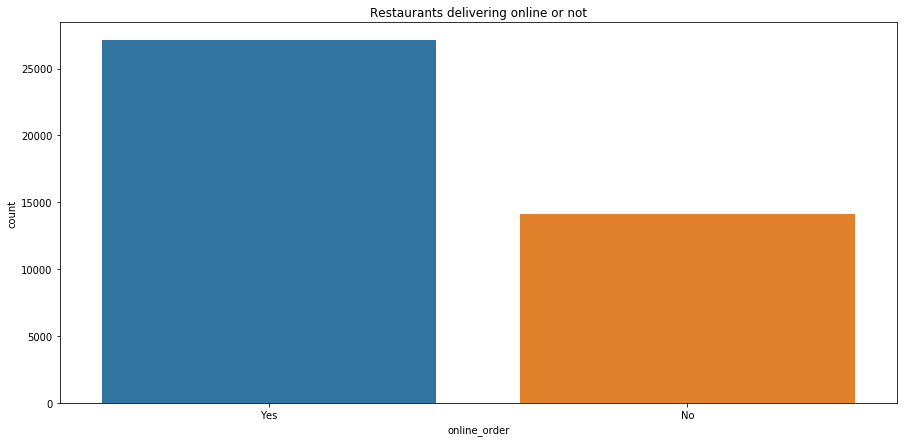

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(df['online_order'])
plt.title("Restaurants delivering online or not")

Text(0.5, 1.0, 'Restaurants Book Table or not')

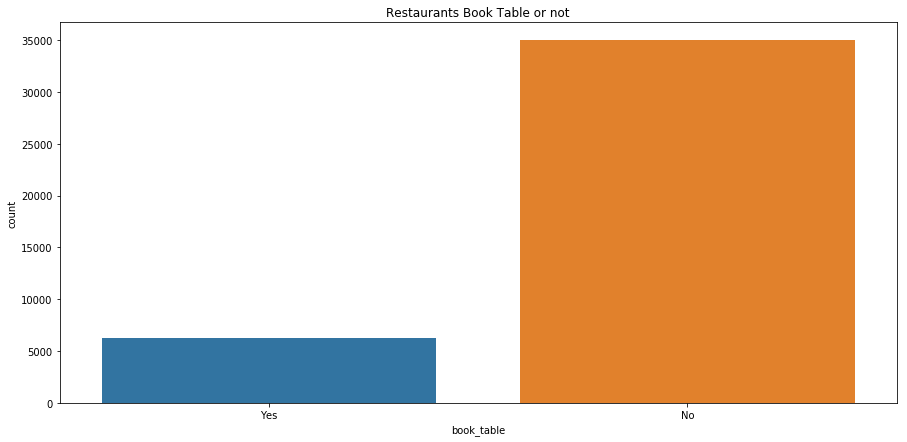

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(df['book_table'])
plt.title("Restaurants Book Table or not")

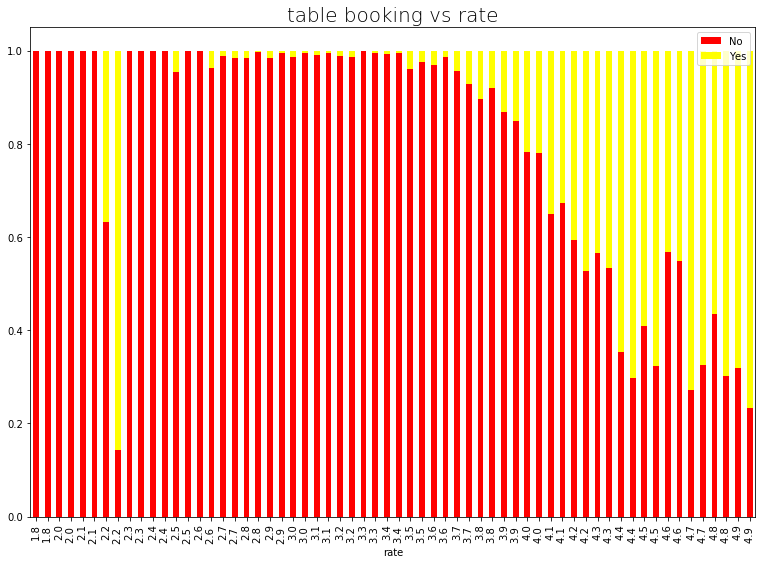

In [10]:

plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

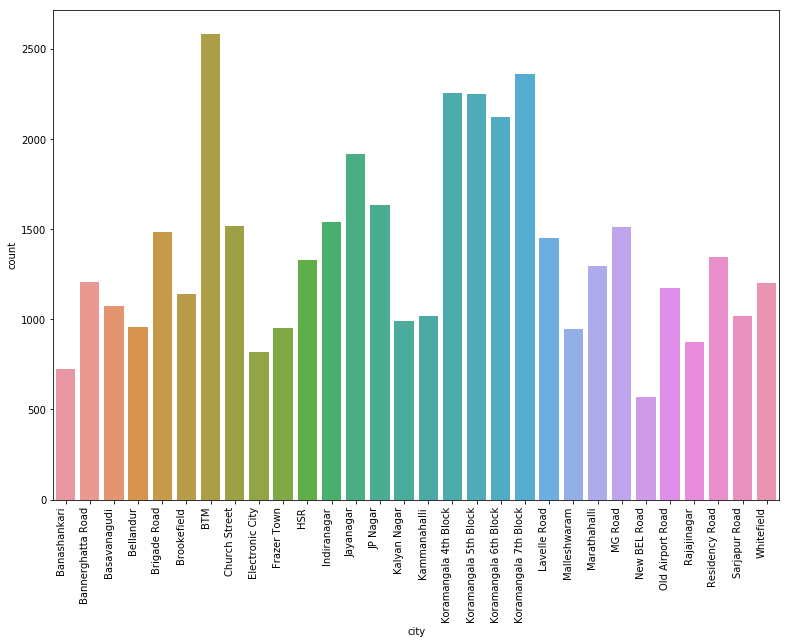

In [11]:
g = sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")

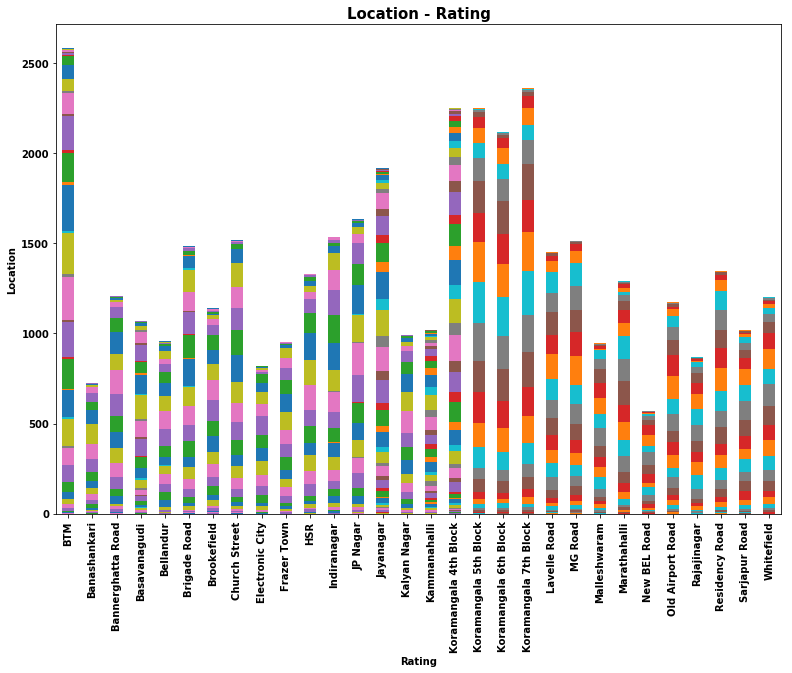

In [12]:
loc_plt = pd.crosstab(df['city'],df['rate'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

[Text(0, 0, 'Casual Dining'),
 Text(0, 0, 'Cafe, Casual Dining'),
 Text(0, 0, 'Quick Bites'),
 Text(0, 0, 'Casual Dining, Cafe'),
 Text(0, 0, 'Cafe'),
 Text(0, 0, 'Quick Bites, Cafe'),
 Text(0, 0, 'Cafe, Quick Bites'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Mess'),
 Text(0, 0, 'Dessert Parlor'),
 Text(0, 0, 'Bakery, Dessert Parlor'),
 Text(0, 0, 'Pub'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Takeaway, Delivery'),
 Text(0, 0, 'Fine Dining'),
 Text(0, 0, 'Beverage Shop'),
 Text(0, 0, 'Sweet Shop'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Dessert Parlor, Sweet Shop'),
 Text(0, 0, 'Bakery, Quick Bites'),
 Text(0, 0, 'Sweet Shop, Quick Bites'),
 Text(0, 0, 'Kiosk'),
 Text(0, 0, 'Food Truck'),
 Text(0, 0, 'Quick Bites, Dessert Parlor'),
 Text(0, 0, 'Beverage Shop, Quick Bites'),
 Text(0, 0, 'Beverage Shop, Dessert Parlor'),
 Text(0, 0, 'Takeaway'),
 Text(0, 0, 'Pub, Casual Dining'),
 Text(0, 0, 'Casual Dining, Bar'),
 Text(0, 0, 'Dessert Parlor, Beverage Shop'),
 Text(0, 0, 'Quick Bites, Bakery'),
 Tex

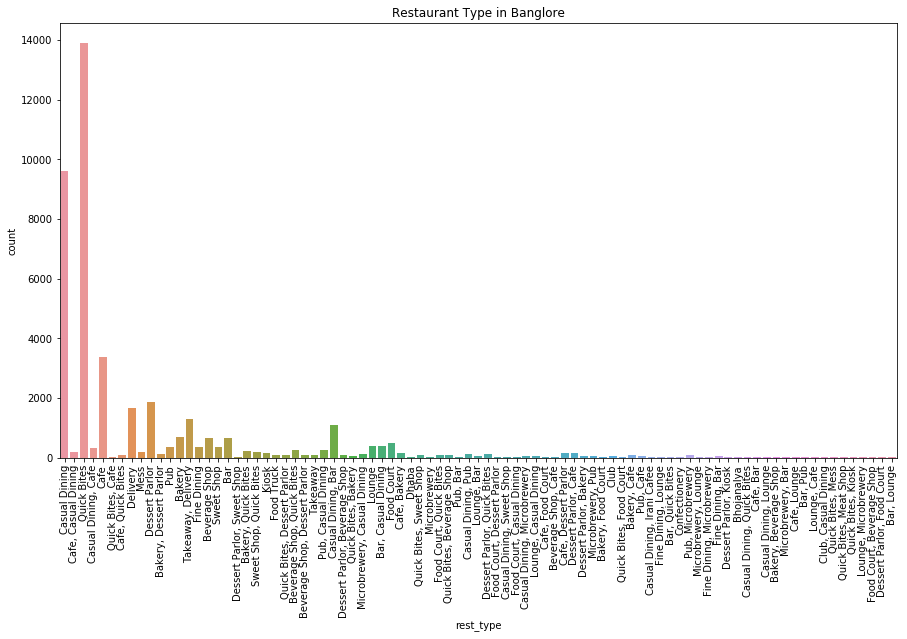

In [13]:
plt.figure(figsize=(15,8))
plt.title("Restaurant Type in Banglore")
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(),rotation=90)

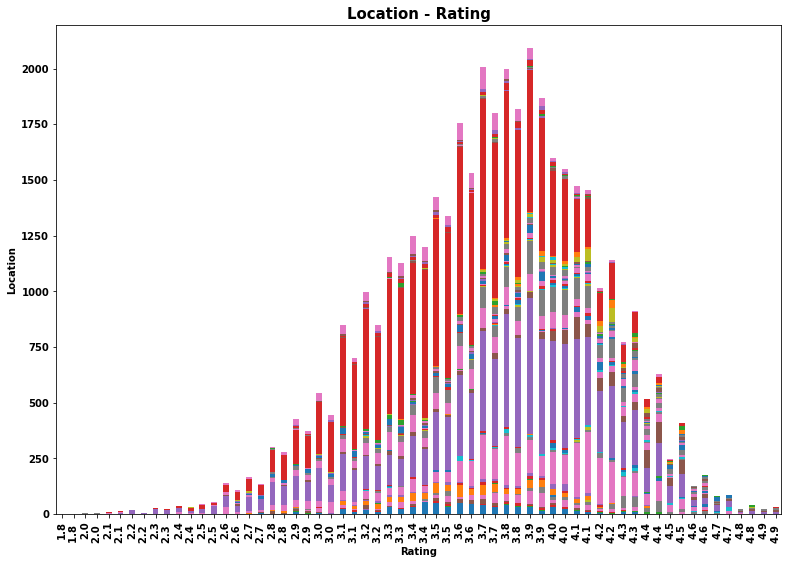

In [14]:
loc_plt = pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

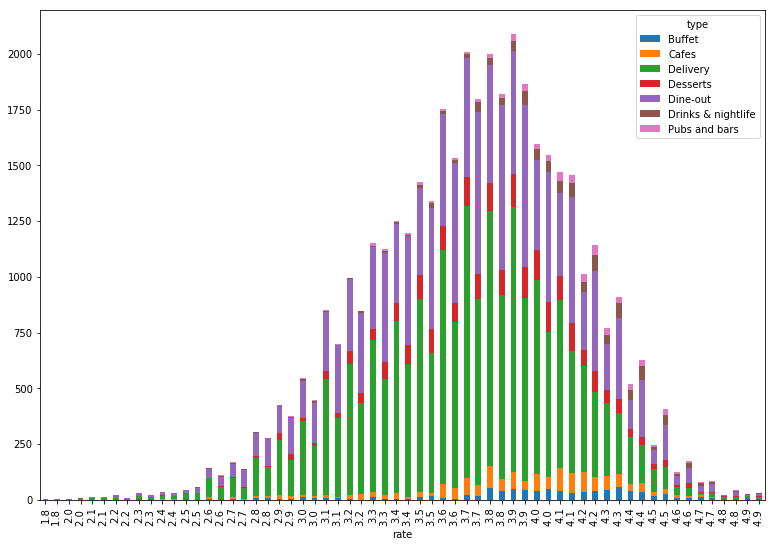

In [15]:
type_rate = pd.crosstab(df['rate'],df['type'])
type_rate.plot.bar(stacked=True)
# sns.countplot(type_rate)

[Text(0, 0, '100'),
 Text(0, 0, '1000'),
 Text(0, 0, '1050'),
 Text(0, 0, '1100'),
 Text(0, 0, '120'),
 Text(0, 0, '1200'),
 Text(0, 0, '1250'),
 Text(0, 0, '130'),
 Text(0, 0, '1300'),
 Text(0, 0, '1350'),
 Text(0, 0, '1400'),
 Text(0, 0, '1450'),
 Text(0, 0, '150'),
 Text(0, 0, '1500'),
 Text(0, 0, '1600'),
 Text(0, 0, '1650'),
 Text(0, 0, '1700'),
 Text(0, 0, '180'),
 Text(0, 0, '1800'),
 Text(0, 0, '1900'),
 Text(0, 0, '199'),
 Text(0, 0, '200'),
 Text(0, 0, '2000'),
 Text(0, 0, '2100'),
 Text(0, 0, '2200'),
 Text(0, 0, '230'),
 Text(0, 0, '2300'),
 Text(0, 0, '240'),
 Text(0, 0, '2400'),
 Text(0, 0, '250'),
 Text(0, 0, '2500'),
 Text(0, 0, '2600'),
 Text(0, 0, '2700'),
 Text(0, 0, '2800'),
 Text(0, 0, '300'),
 Text(0, 0, '3000'),
 Text(0, 0, '3200'),
 Text(0, 0, '330'),
 Text(0, 0, '3400'),
 Text(0, 0, '350'),
 Text(0, 0, '3500'),
 Text(0, 0, '3700'),
 Text(0, 0, '40'),
 Text(0, 0, '400'),
 Text(0, 0, '4000'),
 Text(0, 0, '4100'),
 Text(0, 0, '450'),
 Text(0, 0, '4500'),
 Text(0, 

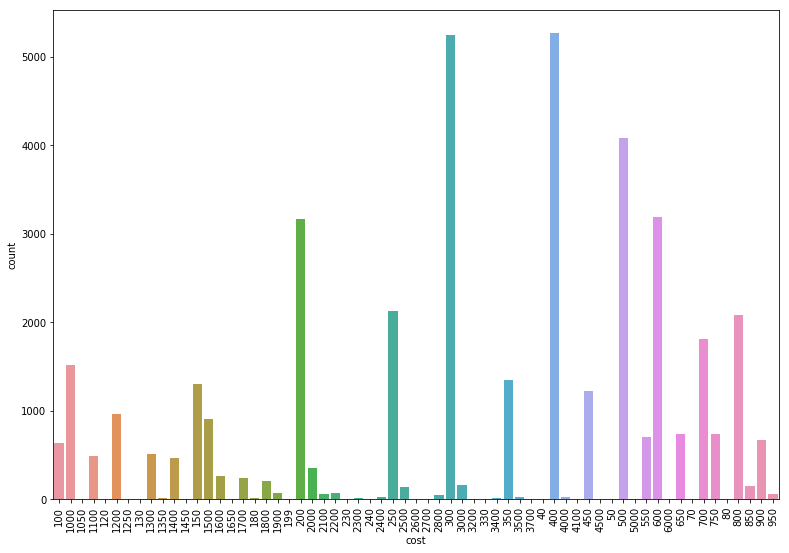

In [16]:
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'No of Resturatent in Location')

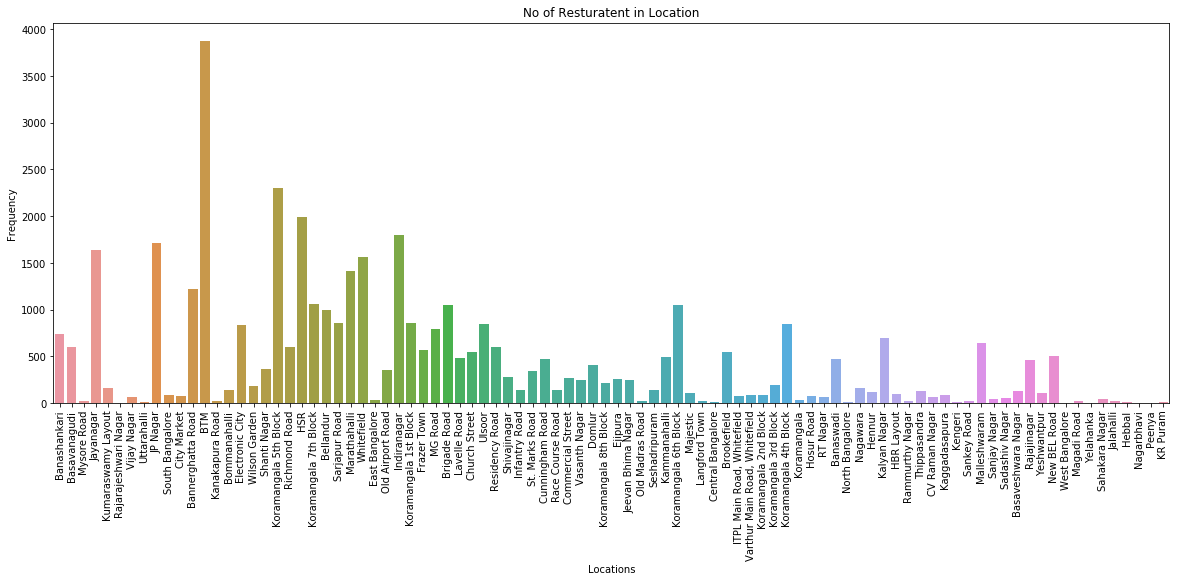

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(),rotation=90)
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.title("No of Resturatent in Location")

Text(0.5, 1.0, 'Most Number of Chains')

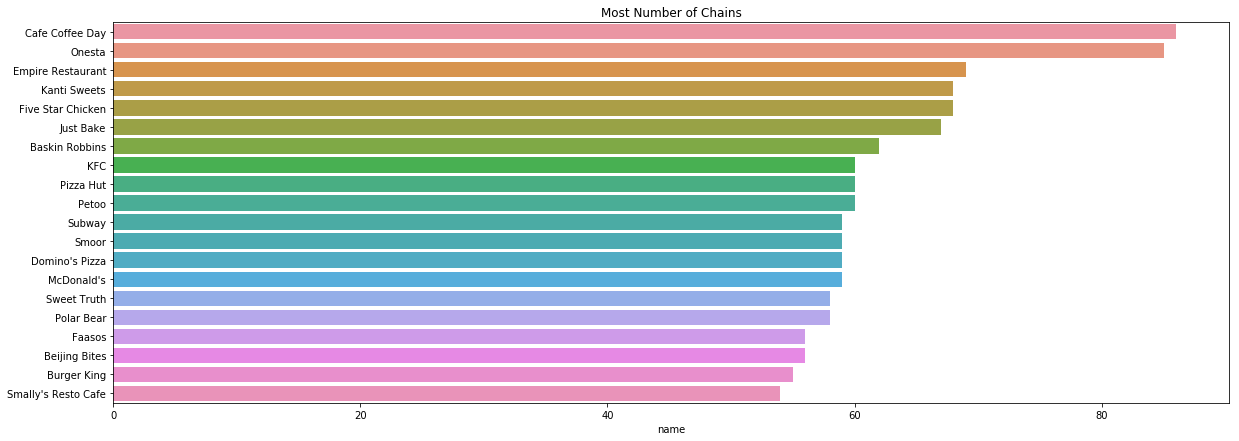

In [18]:
plt.figure(figsize=(20,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Most Number of Chains")

In [19]:
mostpopular = df.loc[df.rate.value_counts()[:20]]
mostpopular.dropna(inplace=True)
mostpopular.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
2091,Pot Biryani,Yes,No,3.1,166.0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, Biryani, Seafood",600,"[('Rated 1.0', 'RATED\n pathetic, never order...",Dine-out,Bannerghatta Road
2008,Halli Sogasu,No,No,3.0,15.0,Bannerghatta Road,Casual Dining,"South Indian, Andhra",600,"[('Rated 1.0', 'RATED\n I and one of my frien...",Dine-out,Bannerghatta Road
1867,TFI - The Fresh Ice Cream,Yes,No,3.2,41.0,Bannerghatta Road,Dessert Parlor,"Ice Cream, Beverages",400,"[('Rated 1.0', ""RATED\n I ordered DBC from th...",Desserts,Bannerghatta Road
1800,Combo Studio,Yes,No,3.1,16.0,Bannerghatta Road,Casual Dining,"North Indian, Biryani, Chinese",500,"[('Rated 4.0', 'RATED\n loved chicken kadai')...",Delivery,Bannerghatta Road
1754,Night Panda,No,No,2.9,39.0,JP Nagar,"Takeaway, Delivery","Fast Food, North Indian, Chinese",500,"[('Rated 1.0', ""RATED\n wher is my food?? nob...",Delivery,Bannerghatta Road


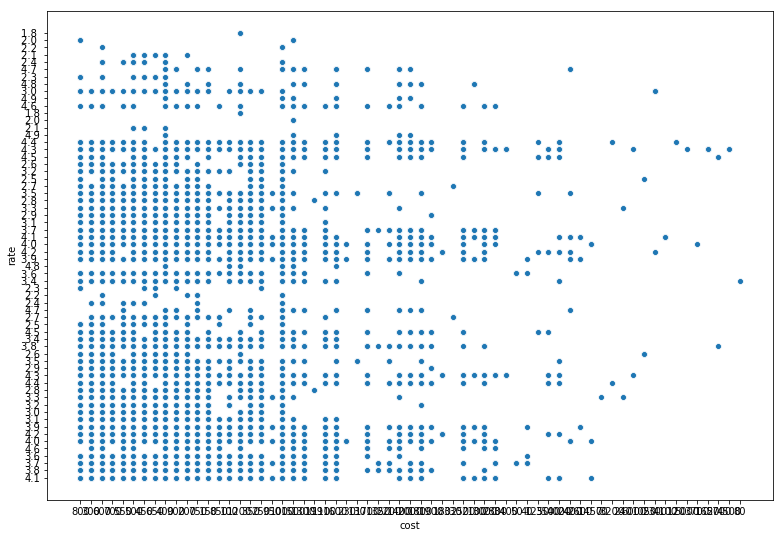

In [20]:
g = sns.scatterplot(df['cost'],df['rate'])

In [21]:
dfx = df
dfx = dfx.drop(['name','reviews_list'],axis=1)
dfx.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
enc = LabelEncoder()
dfx.online_order = enc.fit_transform(dfx.online_order)
dfx.book_table = enc.fit_transform(dfx.book_table)
dfx.location = enc.fit_transform(dfx.location)
dfx.rest_type = enc.fit_transform(dfx.rest_type)
dfx.cuisines = enc.fit_transform(dfx.cuisines)
dfx.type = enc.fit_transform(dfx.type)
dfx.city = enc.fit_transform(dfx.city)
dfx = dfx.dropna()
dfx.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,1,1,4.1,775,1,24,1894,800,0,1
1,1,0,4.1,787,1,24,816,800,0,1
2,1,0,3.8,918,1,19,653,800,0,1
3,0,0,3.7,88,1,73,2221,300,0,1
4,0,0,3.8,166,4,24,1921,600,0,1


In [23]:
X = dfx.drop(['rate'],axis=1)
y = dfx['rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
ref=DecisionTreeRegressor(min_samples_leaf=.0001)
ref.fit(X_train,y_train)
y_predict=ref.predict(X_test)
r2_score(y_test,y_predict)

NameError: name 'r2_score' is not defined

In [25]:
ref = RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
ref.fit(X_train,y_train)
y_predict = ref.predict(X_test)
r2_score(y_predict,y_test)

NameError: name 'r2_score' is not defined

In [26]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9094854135454246

In [27]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
accuracy_score(y_test, y_pred)

0.10751266798854373

In [28]:
knn = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)    
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.72137768965264
